# Starting notebook for data exploration and visualization techniques.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

Loading the first dataset

In [31]:
df_dataset_01 : pd.DataFrame = pd.read_csv('datasets\climate_change_indicators.csv')

Exploring the data

In [32]:
df_dataset_01.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [33]:
print(df_dataset_01.columns)
print(df_dataset_01.dtypes)
print(f"número de instâncias do dataframe = {df_dataset_01.shape[0]}")
df_dataset_01.shape

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')
ObjectId       int64
Country       object
ISO2          object
ISO3          object
Indicator     object
              ...   
F2018        float64
F2019        float64
F2020        float64
F2021        float64
F2022        float64
L

(225, 72)

Trying to pre process the data

In [34]:
# pip install missingno

<Axes: >

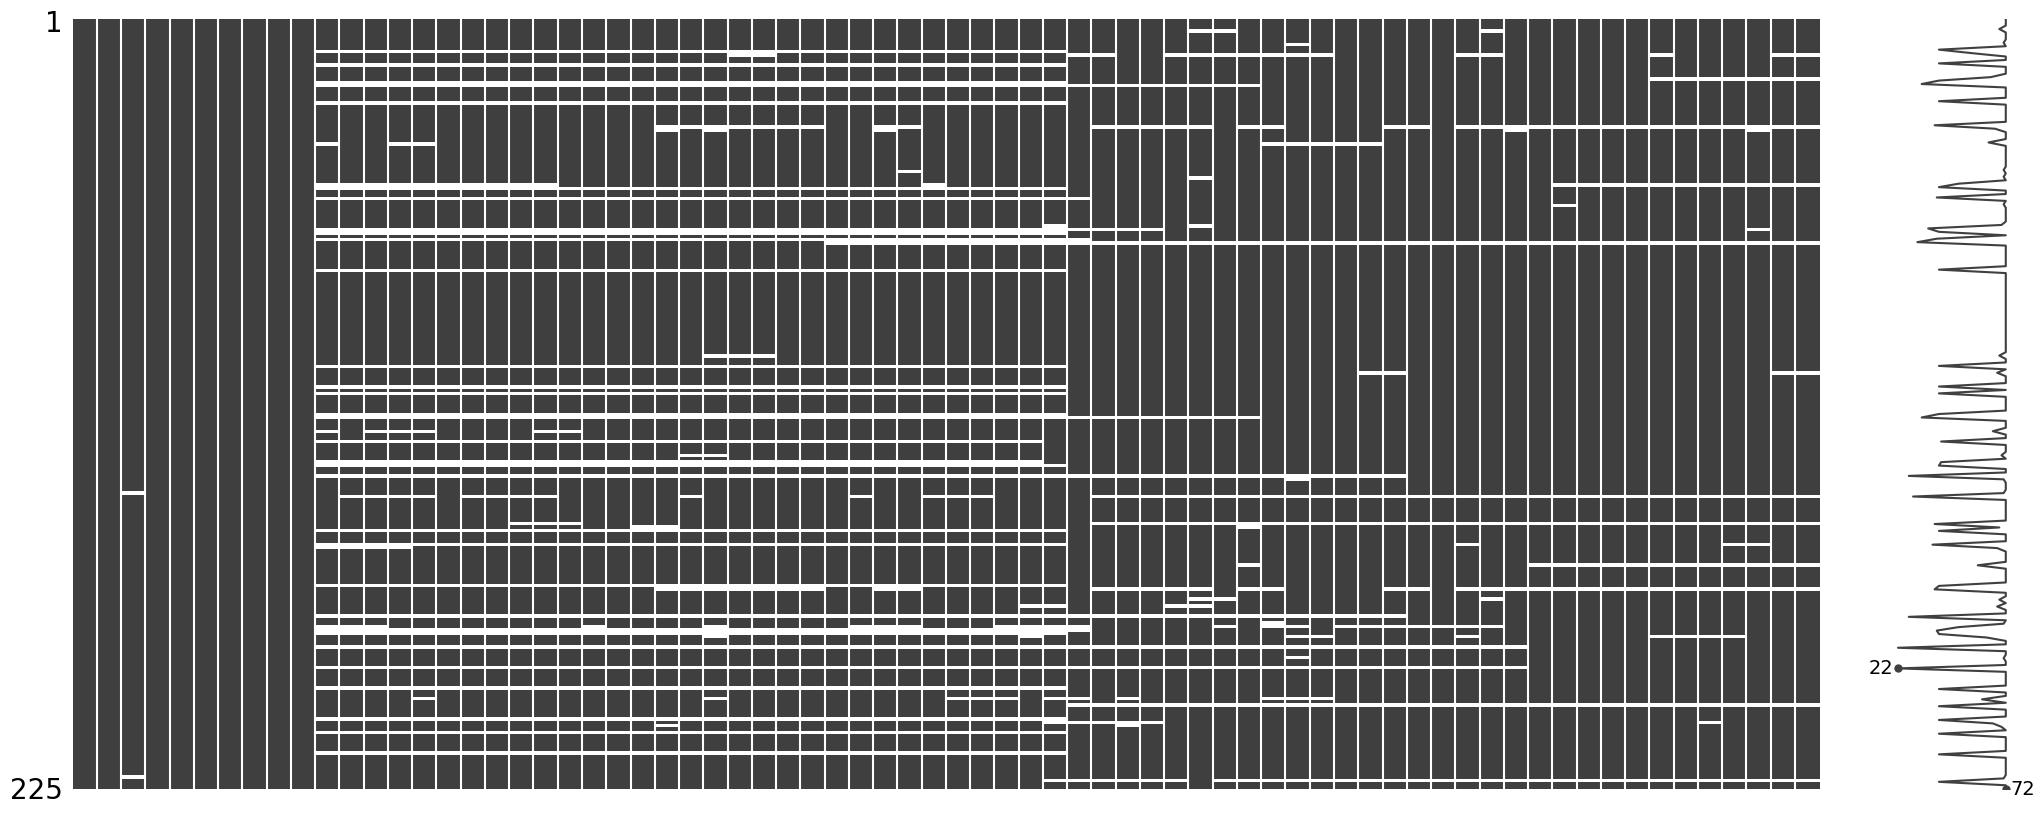

In [36]:
import missingno as msno

msno.matrix(df_dataset_01) #shows in a graphic the missing data (nan values)


First we'll remove the instances with missing data

In [8]:
# just a copy to not loose the original df
df_test_01 : pd.DataFrame = df_dataset_01.copy()
# removing the instances with NaN
df_test_01 = df_test_01.dropna() 

In [ ]:
# checking it
msno.matrix(df_test_01)

Trying to plot a parallel coordinates graphic from the first dataframe after removing NaN values

In [ ]:
# selecting numeric values only from the dataframe
df_aux_01 : pd.DataFrame = df_test_01.select_dtypes(include=['number']) 

# normalizing the data
normalized_row : pd.DataFrame = (df_aux_01 - df_aux_01.min()) / (df_aux_01.max() - df_aux_01.min())

# creating a X axis 
x = range(normalized_row.shape[1])
# x = range(df_aux_01.shape[1])

# setting up
plt.figure(figsize=(10, 6))
for i in range(len(normalized_row)):
    plt.plot(x, normalized_row.iloc[i, :], marker='o')

# graphic settings
plt.title('Gráfico de Coordenadas Paralelas')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

In [ ]:
from pandas.plotting import parallel_coordinates

# selecting numeric values only from the dataframe
df_aux_01 : pd.DataFrame = df_test_01.select_dtypes(include=['number']) 
df_aux_01['Country'] = df_dataset_01['Country']


# setting up
plt.figure(figsize=(10, 6))
parallel_coordinates(df_aux_01, 'Country', colormap=plt.get_cmap("Set1"))

# graphic settings
plt.title('Gráfico de Coordenadas Paralelas')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(True)
plt.show()



searching for Brazil's data 

In [ ]:
# showing the entire result for Brazil's data
row : pd.Series = df_dataset_01.loc[df_dataset_01['Country'] == 'Brazil']
if not row.empty:
    print(row)

Trying to plot Brazil's data


In [ ]:
from pandas.plotting import parallel_coordinates

# # selecting numeric values only from the dataframe
# df_aux_01 : pd.DataFrame = df_test_01.select_dtypes(include=['number']) 
# df_aux_01['Country'] = df_dataset_01['Country']
aux : pd.Series = row.select_dtypes(include=['number'])
aux['Country'] = row['Country']

# setting up
plt.figure(figsize=(10, 6))
parallel_coordinates(aux, 'Country', colormap=plt.get_cmap("Set1"))

# graphic settings
plt.title('Gráfico de Coordenadas Paralelas')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

trying again

In [14]:
# # selecting numeric values only from the Brazil's data row
# aux : pd.Series = row.select_dtypes(include=['number'])

# # normalizing the data
# # normalized_row : pd.DataFrame = (aux - aux.min()) / (aux.max() - aux.min())

# # # creating a X axis 
# # x = range(normalized_row.shape[1])

# # setting up
# plt.figure(figsize=(10, 6))
# plt.plot(aux, aux, marker='o')

# # graphic settings
# plt.title('Gráfico de Coordenadas Paralelas')
# plt.xlabel('Variáveis')
# plt.ylabel('Valores')
# plt.grid(True)
# plt.show()

Starting over, trying other stuff: dimension's number reduction, dropping columns, removing NaNs, using chunks of the instances and more.

In [15]:
df_dataset_01 : pd.DataFrame = pd.read_csv('datasets\climate_change_indicators.csv')

In [ ]:
df_dataset_01.head()

In [ ]:
row_values : pd.Series = df_dataset_01.iloc[1]
print(type(row_values))
print(row_values)

In [ ]:
column_value : str = df_dataset_01.iloc[1]['Indicator']
print(type(column_value))
print(column_value)

In [ ]:
column_values : pd.Series = df_dataset_01.iloc[:, 1]
print(type(df_dataset_01.iloc[:, 1]))
print(df_dataset_01.iloc[:, 1])

In [ ]:
column_name : str = df_dataset_01.columns[1]
print(type(column_name))
print(column_name)

In [ ]:
column_names : pd.Index = df_dataset_01.columns
print(type(column_names))
print(column_names)

In [ ]:
from typing import List
# finding object columns
object_columns : List = df_dataset_01.select_dtypes(include='object').columns.to_list()
print(object_columns)

In [ ]:
# keeping the 'Country's column and dropping all other object columns
column_values : pd.Series = df_dataset_01.iloc[:, 1]
# print(column_values)
column_name_to_save : str = df_dataset_01.columns[1]
# print(column_name_to_save)
column_values_to_save : pd.Series = df_dataset_01.iloc[:, 1]
# print(column_values_to_save)
# dropping all objects columns
df_dataset_01_numeric : pd.DataFrame = df_dataset_01.drop(columns=object_columns)
df_dataset_01_numeric.drop(columns='ObjectId', inplace=True)
df_dataset_01_numeric.head() # do we have a dataset with country's names and all the numeric values? And about the NaN?

In [24]:
# msno.matrix	(df_dataset_01_numeric)

In [ ]:
print(f"número de instâncias do dataframe = {df_dataset_01_numeric.shape[0]}") # Nan still on

In [26]:
# dropping Nan values
df_dataset_01_numeric_no_nan : pd.DataFrame = df_dataset_01_numeric.dropna()
# print(f"número de instâncias do dataframe = {df_dataset_01_numeric_no_nan.shape[0]}") 
# msno.matrix(df_dataset_01_numeric_no_nan) # alright, no NaNs

removing some dimensions

In [ ]:
n_columns : int = len(df_dataset_01_numeric_no_nan.columns)
# print(n_columns)

# selecting the remaining columns
first_dimension_sample : pd.DataFrame = df_dataset_01_numeric_no_nan.iloc[:, :3]
second_dimension_sample : pd.DataFrame = df_dataset_01_numeric_no_nan.iloc[:, n_columns // 2 : (n_columns // 2) +3]
third_dimension_sample : pd.DataFrame = df_dataset_01_numeric_no_nan.iloc[:, -3:]

reduced_dimension_df : pd.DataFrame = pd.concat([first_dimension_sample, second_dimension_sample, third_dimension_sample], axis=1)
# adding back the Country column
reduced_dimension_df.insert(0, column_name_to_save, column_values_to_save)
reduced_dimension_df.head()

Trying to plot Brazil's data

In [ ]:
# getting some of Brazil's data
row : pd.Series = reduced_dimension_df.loc[df_dataset_01['Country'] == 'Brazil']
if not row.empty:
    print(row)

# setting up
plt.figure(figsize=(10, 6))
parallel_coordinates(row, 'Country', colormap=plt.get_cmap("Set1"))

# graphic settings
plt.title('Gráfico de Coordenadas Paralelas')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(False)
plt.show()

Plotting 10 random countries

In [ ]:
df_final_sample : pd.DataFrame = reduced_dimension_df.sample(n=10)

# setting up
plt.figure(figsize=(10, 6))
parallel_coordinates(df_final_sample, 'Country', colormap=plt.get_cmap("Set1"))

# graphic settings
plt.title('Gráfico de Coordenadas Paralelas')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.grid(False)
plt.show()